In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/synthetic_hospital_readmissions_data.csv')

In [ ]:
df.head()

,Patient_ID,Age,Gender,Admission_Type,Diagnosis,Num_Lab_Procedures,Num_Medications,Num_Outpatient_Visits,Num_Inpatient_Visits,Num_Emergency_Visits,Num_Diagnoses,A1C_Result,Readmitted
0,1,69,Female,Urgent,Diabetes,35,14,2,1,4,5,Normal,No
1,2,32,Other,Emergency,Infection,66,3,1,2,4,6,NaN,No
2,3,78,Female,Elective,Diabetes,22,2,4,3,3,5,Abnormal,Yes
3,4,38,Female,Urgent,Infection,22,10,2,2,3,9,Normal,Yes
4,5,41,Male,Emergency,Heart Disease,3,6,4,3,1,2,Abnormal,No


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Patient_ID             10000 non-null  int64 
 1   Age                    10000 non-null  int64 
 2   Gender                 10000 non-null  object
 3   Admission_Type         10000 non-null  object
 4   Diagnosis              10000 non-null  object
 5   Num_Lab_Procedures     10000 non-null  int64 
 6   Num_Medications        10000 non-null  int64 
 7   Num_Outpatient_Visits  10000 non-null  int64 
 8   Num_Inpatient_Visits   10000 non-null  int64 
 9   Num_Emergency_Visits   10000 non-null  int64 
 10  Num_Diagnoses          10000 non-null  int64 
 11  A1C_Result             5966 non-null   object
 12  Readmitted             10000 non-null  object
dtypes: int64(8), object(5)
memory usage: 1015.8+ KB


In [ ]:
df = df.drop_duplicates()

In [ ]:
df['Readmitted'].value_counts()

,count
Readmitted,
No,5054
Yes,4946


In [ ]:
df.head()

,Patient_ID,Age,Gender,Admission_Type,Diagnosis,Num_Lab_Procedures,Num_Medications,Num_Outpatient_Visits,Num_Inpatient_Visits,Num_Emergency_Visits,Num_Diagnoses,A1C_Result,Readmitted
0,1,69,Female,Urgent,Diabetes,35,14,2,1,4,5,Normal,No
1,2,32,Other,Emergency,Infection,66,3,1,2,4,6,NaN,No
2,3,78,Female,Elective,Diabetes,22,2,4,3,3,5,Abnormal,Yes
3,4,38,Female,Urgent,Infection,22,10,2,2,3,9,Normal,Yes
4,5,41,Male,Emergency,Heart Disease,3,6,4,3,1,2,Abnormal,No


In [ ]:
df['Age'].value_counts()

,count
Age,
34,186
30,174
43,174
38,171
71,170
...,...
31,130
24,128
51,127


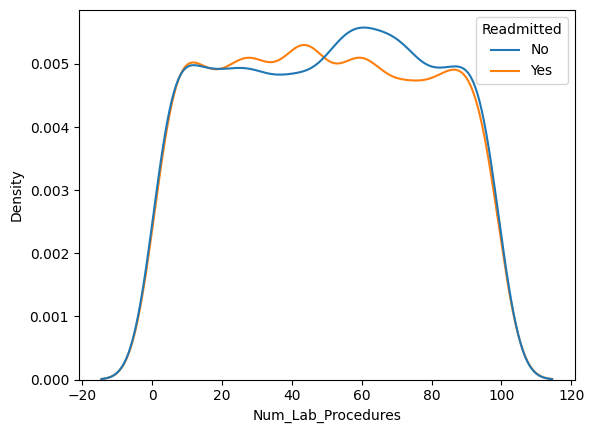

In [ ]:
sns.kdeplot(data=df, x='Num_Lab_Procedures', hue='Readmitted')
plt.show()

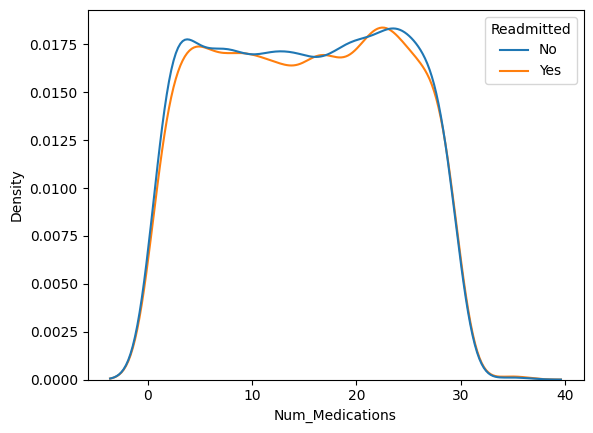

In [ ]:
sns.kdeplot(data=df, x='Num_Medications', hue='Readmitted')
plt.show()

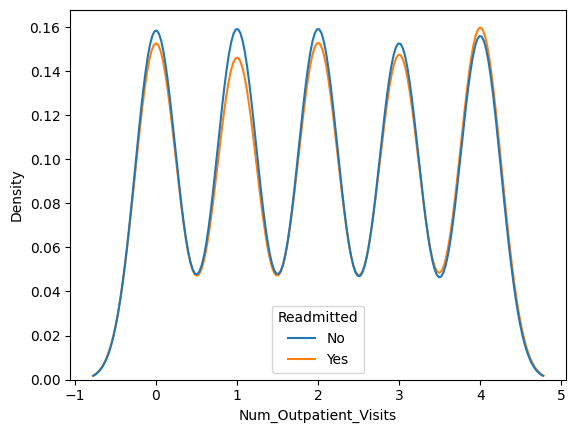

In [ ]:
sns.kdeplot(data=df, x='Num_Outpatient_Visits', hue='Readmitted')
plt.show()

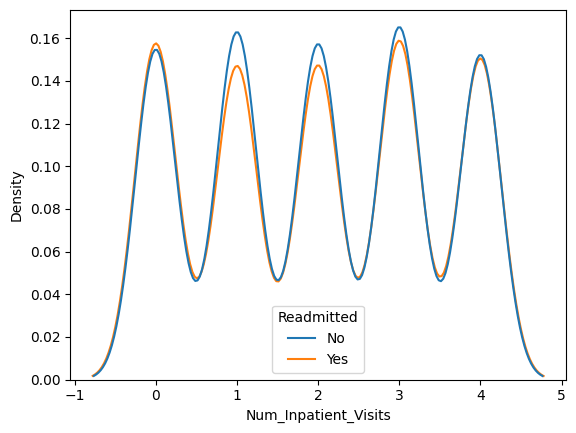

In [ ]:
sns.kdeplot(data=df, x='Num_Inpatient_Visits', hue='Readmitted')
plt.show()

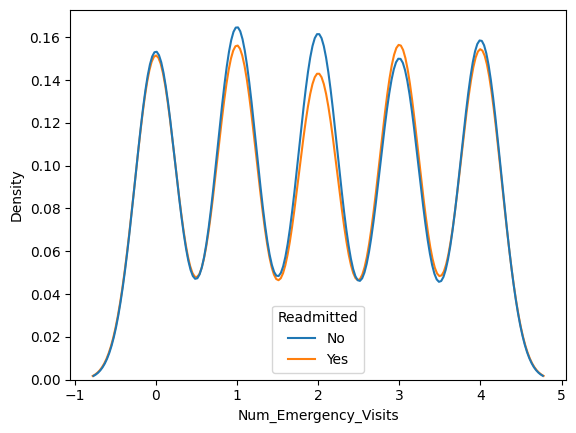

In [ ]:
sns.kdeplot(data=df, x='Num_Emergency_Visits', hue='Readmitted')
plt.show()

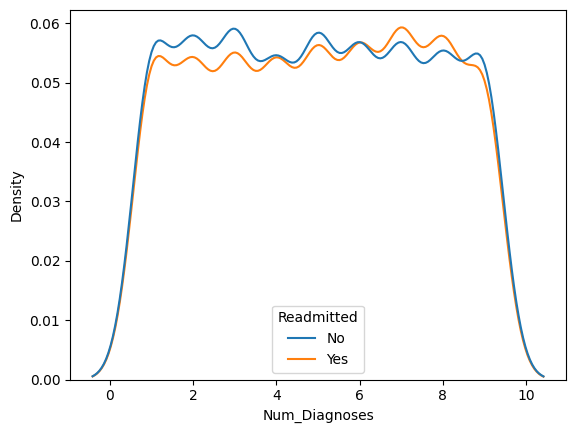

In [ ]:
sns.kdeplot(data=df, x='Num_Diagnoses', hue='Readmitted')
plt.show()

In [ ]:
df.head()

,Patient_ID,Age,Gender,Admission_Type,Diagnosis,Num_Lab_Procedures,Num_Medications,Num_Outpatient_Visits,Num_Inpatient_Visits,Num_Emergency_Visits,Num_Diagnoses,A1C_Result,Readmitted
0,1,69,Female,Urgent,Diabetes,35,14,2,1,4,5,Normal,No
1,2,32,Other,Emergency,Infection,66,3,1,2,4,6,NaN,No
2,3,78,Female,Elective,Diabetes,22,2,4,3,3,5,Abnormal,Yes
3,4,38,Female,Urgent,Infection,22,10,2,2,3,9,Normal,Yes
4,5,41,Male,Emergency,Heart Disease,3,6,4,3,1,2,Abnormal,No


In [ ]:
df = df.drop(columns=['Patient_ID', 'A1C_Result'], errors='ignore')

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV

In [ ]:
X = df.drop(columns=['Readmitted'])
y = df['Readmitted']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train.head()

,Age,Gender,Admission_Type,Diagnosis,Num_Lab_Procedures,Num_Medications,Num_Outpatient_Visits,Num_Inpatient_Visits,Num_Emergency_Visits,Num_Diagnoses
9254,56,Other,Emergency,Injury,32,18,4,2,1,1
1561,70,Male,Urgent,Injury,16,16,1,4,4,7
1670,36,Female,Elective,Infection,42,22,1,4,1,3
6087,60,Female,Elective,Injury,69,12,0,4,0,3
6669,63,Female,Urgent,Diabetes,75,12,4,1,4,5


In [ ]:
X_num = X_train.drop(columns=['Gender', 'Admission_Type', 'Diagnosis'])

In [ ]:
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

def correct_target_labels(X, y, threshold=0.9):
  similarity_matrix = cosine_similarity(X)
  y_corrected = y.copy()

  for i in range(len(X)):
    for j in range(i + 1, len(X)):
      if similarity_matrix[i, j] > threshold:
        cluster_labels = [y[i], y[j]]
        majority_label = max(set(cluster_labels), key=cluster_labels.count)
        y_corrected[i] = majority_label
        y_corrected[j] = majority_label

  return y_corrected

In [ ]:
y_train = correct_target_labels(X_num, y_train, threshold=0.9)

KeyError: 0

In [ ]:
# duplicates = X_train[X_train['Num_Outpatient_Visits'] == X_train['Num_Inpatient_Visits']]
# duplicates

In [ ]:
# from scipy.stats import boxcox
# from sklearn.preprocessing import PowerTransformer

# pt = PowerTransformer(method='yeo-johnson')
# X_train['Num_Medications'] = pt.fit_transform(X_train[['Num_Medications']])
# X_test['Num_Medications'] = pt.transform(X_test[['Num_Medications']])

# sns.kdeplot(X_train['Num_Medications']+1)
# plt.show()

In [ ]:
# df['Diagnosis_per_procedure'] = df['Num_Diagnoses'] / (df['Num_Lab_Procedures']+1)
# df['Medication_per_Diagnosis'] = df['Num_Medications'] / (df['Num_Diagnoses']+1)

# df['Total_Visits'] = df['Num_Outpatient_Visits'] + df['Num_Inpatient_Visits'] + df['Num_Emergency_Visits']
# df['Diagnosis_per_Visit'] = df['Num_Diagnoses'] / (df['Total_Visits']+1)
# df['Medication_per_Visit'] = df['Num_Medications'] / (df['Total_Visits']+1)

# df['Emergency_Inpatient_ratio'] = df['Num_Emergency_Visits'] / (df['Num_Inpatient_Visits']+1)
# df['Outpatient_Inpatient_ratio'] = df['Num_Outpatient_Visits'] / (df['Num_Inpatient_Visits']+1)
# df['Age_per_Visit'] = df['Age'] / (df['Total_Visits']+1)

In [ ]:
# X_train['Outpatient_Inpatient_ratio'] = X_train['Num_Outpatient_Visits'] / (X_train['Num_Inpatient_Visits']+1)
# X_train['Emergency_Inpatient_ratio'] = X_train['Num_Emergency_Visits'] / (X_train['Num_Inpatient_Visits']+1)
# X_train['Total_visits'] = X_train['Num_Outpatient_Visits'] + X_train['Num_Inpatient_Visits'] + X_train['Num_Emergency_Visits']
# X_train['Medication_per_Visit'] = X_train['Num_Medications'] / (X_train['Total_visits']+1)
# X_train['Diagnosis_per_Visit'] = X_train['Num_Diagnoses'] / (X_train['Total_visits']+1)
# X_train['Age_per_Visit'] = X_train['Age'] / (X_train['Total_visits']+1)
# X_train['Diagnosis_per_procedure'] = X_train['Num_Diagnoses'] / (X_train['Num_Lab_Procedures']+1)
# X_train['Medication_per_Diagnosis'] = X_train['Num_Medications'] / (X_train['Num_Diagnoses']+1)


# X_test['Outpatient_Inpatient_ratio'] = X_test['Num_Outpatient_Visits'] / (X_test['Num_Inpatient_Visits']+1)
# X_test['Emergency_Inpatient_ratio'] = X_test['Num_Emergency_Visits'] / (X_test['Num_Inpatient_Visits']+1)
# X_test['Total_visits'] = X_test['Num_Outpatient_Visits'] + X_test['Num_Inpatient_Visits'] + X_test['Num_Emergency_Visits']
# X_test['Medication_per_Visit'] = X_test['Num_Medications'] / (X_test['Total_visits']+1)
# X_test['Diagnosis_per_Visit'] = X_test['Num_Diagnoses'] / (X_test['Total_visits']+1)
# X_test['Age_per_Visit'] = X_test['Age'] / (X_test['Total_visits']+1)
# X_test['Diagnosis_per_procedure'] = X_test['Num_Diagnoses'] / (X_test['Num_Lab_Procedures']+1)
# X_test['Medication_per_Diagnosis'] = X_test['Num_Medications'] / (X_test['Num_Diagnoses']+1)

In [ ]:
# X_train = X_train.drop(columns=['Num_Outpatient_Visits', 'Num_Inpatient_Visits', 'Num_Emergency_Visits',
#                       'Num_Medications', 'Num_Diagnoses', 'Num_Lab_Procedures'], errors='ignore')

# X_test = X_test.drop(columns=['Num_Outpatient_Visits', 'Num_Inpatient_Visits', 'Num_Emergency_Visits',
#                       'Num_Medications', 'Num_Diagnoses', 'Num_Lab_Procedures'], errors='ignore')

In [ ]:
# sns.kdeplot(X_train['Total_visits'])
# plt.show()

In [ ]:
# X_train['Diagnosis_per_Visit'] = boxcox(X_train['Diagnosis_per_Visit']+1)[0]
# X_train['Emergency_Inpatient_ratio'] = np.square(X_train['Emergency_Inpatient_ratio'])
# X_train['Outpatient_Inpatient_ratio'] = np.square(X_train['Outpatient_Inpatient_ratio'])

In [ ]:
def Detect_outliers(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_value = Q1 - (1.5 * IQR)
    upper_value = Q3 + (1.5 * IQR)
    return lower_value, upper_value

In [ ]:
lower_age, upper_age = Detect_outliers(X_train['Age'])
X_train[(X_train['Age'] <= lower_age) | (X_train['Age'] >= upper_age)]

,Age,Gender,Admission_Type,Diagnosis,Num_Lab_Procedures,Num_Medications,Num_Outpatient_Visits,Num_Inpatient_Visits,Num_Emergency_Visits,Num_Diagnoses
56,150,Other,Urgent,Diabetes,72,18,4,0,3,5
51,150,Male,Elective,Injury,35,9,1,4,0,5
57,150,Female,Emergency,Heart Disease,49,19,0,1,2,7
53,150,Male,Elective,Infection,55,20,2,0,2,5
52,150,Other,Urgent,Injury,18,18,0,0,3,4
54,150,Female,Elective,Diabetes,78,3,3,1,2,5
55,150,Female,Elective,Diabetes,52,23,2,4,4,4


In [ ]:
X_train['Age'] = X_train['Age'].apply(lambda x: X_train['Age'].median() if ((x <= lower_age) | (x >= upper_age)) else x)

In [ ]:
from sklearn.preprocessing import FunctionTransformer, OneHotEncoder, LabelEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier, StackingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
le = LabelEncoder()

y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

In [ ]:
# categories = X_train['A1C_Result'].dropna().unique()

# X_train['A1C_Result'] = X_train['A1C_Result'].apply(lambda x: np.random.choice(categories) if pd.isna(x) else x)
# X_test['A1C_Result'] = X_test['A1C_Result'].apply(lambda x: np.random.choice(categories) if pd.isna(x) else x)

In [ ]:
X_train.head()

,Age,Gender,Admission_Type,Diagnosis,Num_Lab_Procedures,Num_Medications,Num_Outpatient_Visits,Num_Inpatient_Visits,Num_Emergency_Visits,Num_Diagnoses
9254,56.0,Other,Emergency,Injury,32,18,4,2,1,1
1561,70.0,Male,Urgent,Injury,16,16,1,4,4,7
1670,36.0,Female,Elective,Infection,42,22,1,4,1,3
6087,60.0,Female,Elective,Injury,69,12,0,4,0,3
6669,63.0,Female,Urgent,Diabetes,75,12,4,1,4,5


In [ ]:
ohe_cols = ['Gender', 'Admission_Type', 'Diagnosis']
standardScaler_cols = [col for col in X_train.select_dtypes(include=['int64','float64']).columns]
standardScaler_cols

['Age',
 'Num_Lab_Procedures',
 'Num_Medications',
 'Num_Outpatient_Visits',
 'Num_Inpatient_Visits',
 'Num_Emergency_Visits',
 'Num_Diagnoses']

In [ ]:
preprocessor = ColumnTransformer(
    transformers=[
        ('ohe', OneHotEncoder(handle_unknown='ignore'), ohe_cols),
        ('standardscaler', StandardScaler(), standardScaler_cols)
    ],
)

In [ ]:
pipeline_rf = Pipeline(
    steps=[
        ('preprocessor', preprocessor),
        ('rf', RandomForestClassifier(random_state=42))
    ]
)

pipeline_rf.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('ohe',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Gender', 'Admission_Type',
                                                   'Diagnosis']),
                                                 ('standardscaler',
                                                  StandardScaler(),
                                                  ['Age', 'Num_Lab_Procedures',
                                                   'Num_Medications',
                                                   'Num_Outpatient_Visits',
                                                   'Num_Inpatient_Visits',
                                                   'Num_Emergency_Visits',
                                                   'Num_Diagnoses'])])),
                ('rf', RandomForestClassifier(random_state=42))])

In [ ]:
y_pred_rf = pipeline_rf.predict(X_test)

accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f'Accuracy is : {accuracy_rf}')
print(classification_report(y_test, y_pred_rf))

Accuracy is : 0.532
              precision    recall  f1-score   support

           0       0.54      0.56      0.55      1031
           1       0.52      0.50      0.51       969

    accuracy                           0.53      2000
   macro avg       0.53      0.53      0.53      2000
weighted avg       0.53      0.53      0.53      2000



In [ ]:
print(confusion_matrix(y_test, y_pred_rf))

[[579 452]
 [484 485]]


In [ ]:
categorical_features = ['Gender', 'Admission_Type', 'Diagnosis', 'A1C_Result']

importances = pipeline_rf.named_steps['rf'].feature_importances_

# Get feature names after transformation
feature_names = pipeline_rf.named_steps['preprocessor'].get_feature_names_out()

original_feature_importances = {}
for original_feature in categorical_features:
    encoded_cols = [col for col in feature_names if original_feature in col]
    original_feature_importances[original_feature] = sum(importances[i] for i, col in enumerate(feature_names) if col in encoded_cols)

# 10. Print the original feature importances
print("Original Feature Importances:")
for feature, importance in original_feature_importances.items():
    print(f"{feature}: {importance}")

for i, importance in enumerate(importances):
    print(f"{feature_names[i]}: {importance}")

Original Feature Importances:
Gender: 0.05556227708418517
Admission_Type: 0.05510623887821781
Diagnosis: 0.06792916974850097
A1C_Result: 0
ohe__Gender_Female: 0.018941046193002863
ohe__Gender_Male: 0.0184485922859247
ohe__Gender_Other: 0.018172638605257606
ohe__Admission_Type_Elective: 0.017998802809522704
ohe__Admission_Type_Emergency: 0.01871938612733875
ohe__Admission_Type_Urgent: 0.018388049941356358
ohe__Diagnosis_Diabetes: 0.017278059984080597
ohe__Diagnosis_Heart Disease: 0.015551162126569184
ohe__Diagnosis_Infection: 0.017292037969266337
ohe__Diagnosis_Injury: 0.01780790966858485
standardscaler__Age: 0.17270739216627207
standardscaler__Num_Lab_Procedures: 0.1790848643113936
standardscaler__Num_Medications: 0.1478503375185473
standardscaler__Num_Outpatient_Visits: 0.0718879441064092
standardscaler__Num_Inpatient_Visits: 0.0740538541196436
standardscaler__Num_Emergency_Visits: 0.07306248402811738
standardscaler__Num_Diagnoses: 0.10275543803871295


In [ ]:
pipeline_svc = Pipeline(
    steps=[
        ('preprocessor', preprocessor),
        ('svc', SVC())
    ]
)

pipeline_svc.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('ohe',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Gender', 'Admission_Type',
                                                   'Diagnosis']),
                                                 ('standardscaler',
                                                  StandardScaler(),
                                                  ['Age', 'Num_Lab_Procedures',
                                                   'Num_Medications',
                                                   'Num_Outpatient_Visits',
                                                   'Num_Inpatient_Visits',
                                                   'Num_Emergency_Visits',
                                                   'Num_Diagnoses'])])),
                ('svc', SVC())])

In [ ]:
y_pred_svc = pipeline_svc.predict(X_test)

accuracy_svc = accuracy_score(y_test, y_pred_svc)
print(f'Accuracy is : {accuracy_svc}')

Accuracy is : 0.495


In [ ]:
param_grid_svc = {
    'svc__C': [0.1, 1, 10],
    'svc__kernel': ['linear', 'rbf', 'poly'],
    'svc__gamma': ['scale', 'auto', 0.1, 1],
    'svc__degree': [3, 4, 5]
}

In [ ]:
random_search_svc = RandomizedSearchCV(pipeline_svc, param_grid_svc, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)
random_search_svc.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(transformers=[('ohe',
                                                                               OneHotEncoder(handle_unknown='ignore'),
                                                                               ['Gender',
                                                                                'Admission_Type',
                                                                                'Diagnosis']),
                                                                              ('standardscaler',
                                                                               StandardScaler(),
                                                                               ['Age',
                                                                                'Outpatient_Inpatient_ratio',
                                                                                'Emergency_Inpatient_ratio',
                                                                                'Total_visits',
                                                                                'Medication_per_Visit',
                                                                                'Diagnosis_per_Visit',
                                                                                'Age_per_Visit',
                                                                                'Diagnosis_per_procedure',
                                                                                'Medication_per_Diagnosis'])])),
                                             ('svc', SVC())]),
                   n_jobs=-1,
                   param_distributions={'svc__C': [0.1, 1, 10],
                                        'svc__degree': [3, 4, 5],
                                        'svc__gamma': ['scale', 'auto', 0.1, 1],
                                        'svc__kernel': ['linear', 'rbf',
                                                        'poly']},
                   scoring='accuracy', verbose=1)

In [ ]:
best_pipeline_svc = random_search_svc.best_estimator_
y_pred_svc = best_pipeline_svc.predict(X_test)

print(classification_report(y_test, y_pred_svc))

              precision    recall  f1-score   support

           0       0.50      0.51      0.51      1031
           1       0.47      0.46      0.47       969

    accuracy                           0.49      2000
   macro avg       0.49      0.49      0.49      2000
weighted avg       0.49      0.49      0.49      2000



In [ ]:
print(confusion_matrix(y_test, y_pred_svc))

[[552 479]
 [531 438]]


In [ ]:
best_params_svc = random_search_svc.best_params_

print(f'Best Hyperparameters: {best_params_svc}')

Best Hyperparameters: {'svc__kernel': 'rbf', 'svc__gamma': 1, 'svc__degree': 3, 'svc__C': 10}


In [ ]:
k = 26
pipeline_knn = Pipeline(
    steps=[
        ('preprocessor', preprocessor),
        ('knn', KNeighborsClassifier(n_neighbors=k))
    ]
)

pipeline_knn.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('ohe',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Age', 'Gender',
                                                   'Admission_Type',
                                                   'Diagnosis']),
                                                 ('standardscaler',
                                                  StandardScaler(),
                                                  ['Num_Lab_Procedures',
                                                   'Outpatient_Inpatient_ratio',
                                                   'Emergency_Inpatient_ratio',
                                                   'Total_visits',
                                                   'Medication_per_Visit',
                                                   'Diagnosis_per_Visit'])])),
                ('knn', KNeighborsClassifier(n_neighbors=26))])

In [ ]:
y_pred_knn = pipeline_knn.predict(X_test)

accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f'Accuracy is : {accuracy_knn}')

Accuracy is : 0.505


In [ ]:
pipeline_vc = Pipeline(
    steps=[
        ('preprocessor', preprocessor),
        ('vc', StackingClassifier(estimators=[('rf', RandomForestClassifier()), ('gb', GradientBoostingClassifier()),
                                            ('svc', SVC()), ('knn', KNeighborsClassifier())],
                                  final_estimator=RandomForestClassifier() ))
    ]
)

pipeline_vc.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('ohe',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Age', 'Gender',
                                                   'Admission_Type',
                                                   'Diagnosis']),
                                                 ('standardscaler',
                                                  StandardScaler(),
                                                  ['Num_Lab_Procedures',
                                                   'Outpatient_Inpatient_ratio',
                                                   'Emergency_Inpatient_ratio',
                                                   'Total_visits',
                                                   'Medication_per_Visit',
                                                   'Diagnosis_per_Visit'])])),
                ('vc',
                 StackingClassifier(estimators=[('rf',
                                                 RandomForestClassifier()),
                                                ('gb',
                                                 GradientBoostingClassifier()),
                                                ('svc', SVC()),
                                                ('knn',
                                                 KNeighborsClassifier())],
                                    final_estimator=RandomForestClassifier()))])

In [ ]:
y_pred_vc = pipeline_vc.predict(X_test)

accuracy_vc = accuracy_score(y_test, y_pred_vc)
print(f'Accuracy is : {accuracy_vc}')

Accuracy is : 0.482
